In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pyCloudy as pc
import pyneb as pn
from astropy import units as u
import os
import pandas as pd

# x=np.arange(4000,7000,0.001)
# t_x = np.arange(4000,7000,1)

# total_f_ratio = 5.1

In [20]:
# All = pd.read_csv(r'C:/Users/wlsdl/OneDrive/바탕 화면/White Dwarf/all.txt',delim_whitespace=True,header=0)

data = pd.read_csv(r'/home/jin/cloudy_Test/GS-2024A-Q-305/79data.dat',delim_whitespace=True,header=1)

wave,flux = data['wavelength'].to_numpy() , data['data'].to_numpy() 

In [21]:
ii = (wave>409.75).__and__(wave < 409.95)

xl = data.loc[ii]

xl_w,xl_f =xl['wavelength'].to_numpy() , xl['data'].to_numpy()

a= xl_f.argmax()
print(a)

72


H delta

409.9098201961653 0.049820196165285324


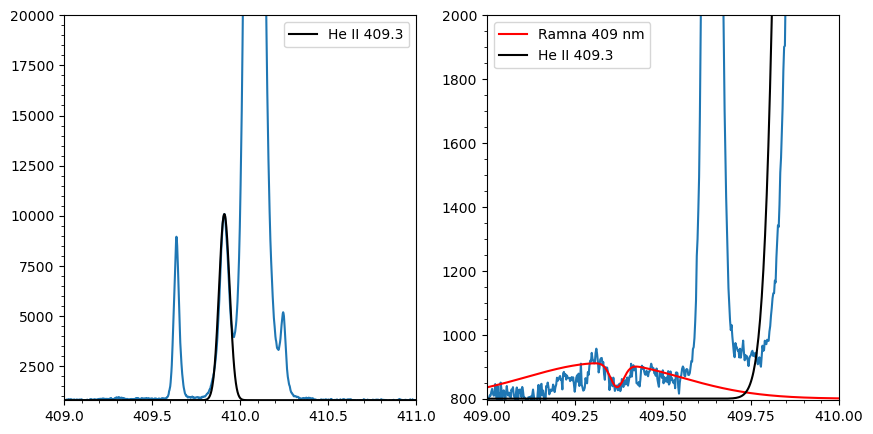

In [22]:
fig = plt.figure(1,figsize=(10,5))
x=np.linspace(wave[0],wave[-1],len(wave))
# print(xl_w)
F0 = (xl_f[a]) - 800
lam = xl_w[a]
lam_0 = 409.86
delm= abs(lam - lam_0 ) 
print(lam,delm)
ratio = 4094/937.4
Fc = 800

def test(F0,lam,lam_i,del_lam_i):
    ff = (lam-lam_i)/(ratio*del_lam_i) 
    fl = (F0*10)*np.exp(-ff**2/2) 
    return (((fl)/ratio**2 * 0.2)) 


def R_Flux(F0,lam,lam_i,del_lam_i,ratio,dum_lam,del_duml,tau,Flux_R,eff):
    ff = (lam-lam_i)/(ratio*del_lam_i) 
    fl = F0*np.exp(-ff**2/2) 
    opf = tau*np.exp(-((lam-dum_lam)/del_duml)**2) 
    return (((fl)/ratio**2 * (Flux_R*eff)))*(1-opf) + Fc
# (((fl)/ratio**2 * 0.2))*(1-opf) + 800 + 50*np.exp(-ff**2) /ratio**2 * 0.2

def Flux(F0,lam,lam_i,del_lam_i):
    ff = (lam-lam_i)/(del_lam_i) 
    fl = (F0*np.exp(-ff**2/2) + Fc) 
    return fl

plt.subplot(121)
plt.plot(wave,flux)
# plt.plot(x,R_Flux(F0,x,409.6,delm,ratio,409.),label='Ramna 409 nm')
plt.plot(x,Flux(F0,x,lam,0.03),'k',label='He II 409.3')
plt.xlim(409,411)
plt.ylim(795,2e4)
plt.legend()
plt.xticks(np.linspace(409,411,5))
plt.minorticks_on()


plt.subplot(122)
plt.plot(wave,flux)
# plt.plot(x,test(F0,x,409.31,0.02))

plt.plot(x,R_Flux(F0,x,409.33,delm,ratio,409.37,0.027,0.67,7.65,0.03),'r',label='Ramna 409 nm')
plt.plot(x,Flux(F0,x,lam,delm),'k',label='He II 409.3')
plt.xlim(409,410)
plt.ylim(795,2e3)
plt.legend()
plt.xticks(np.linspace(409,410,5))
plt.minorticks_on()

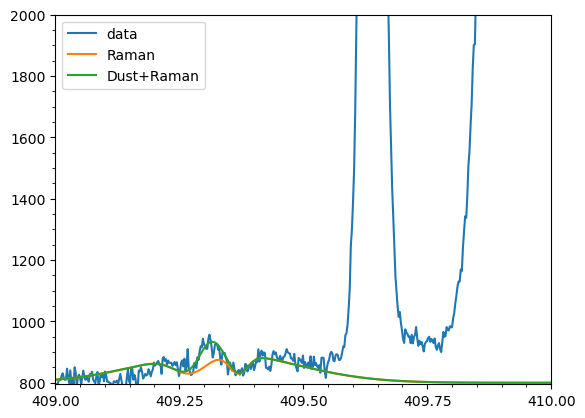

In [23]:
def R_Flux(F0,lam,lam_i,del_lam_i,ratio,dum_lam,del_duml,tau):
    ff = (lam-lam_i)/(ratio*del_lam_i) 
    fl = F0*np.exp(-ff**2) 
    opf = tau*np.exp(-((lam-dum_lam)/del_duml)**2) + tau*np.exp(-((lam-409.27)/0.05)**2)
    return (((fl)/ratio**2 * 0.2))*(1-opf) + 800

f1 = R_Flux(F0,x,409.33,delm,ratio,409.37,0.027,0.67)
f2 = test(F0,x,409.31,0.005)

plt.plot(wave,flux,label='data')
plt.plot(x,f1,label='Raman')
# plt.plot(x,f2,label='Dust_Raman')
plt.plot(x,(f1+0.07*f2),label='Dust+Raman')
plt.xlim(409,410)
plt.ylim(795,2e3)
plt.legend()
plt.xticks(np.linspace(409,410,5))
plt.minorticks_on()

H gamma

72


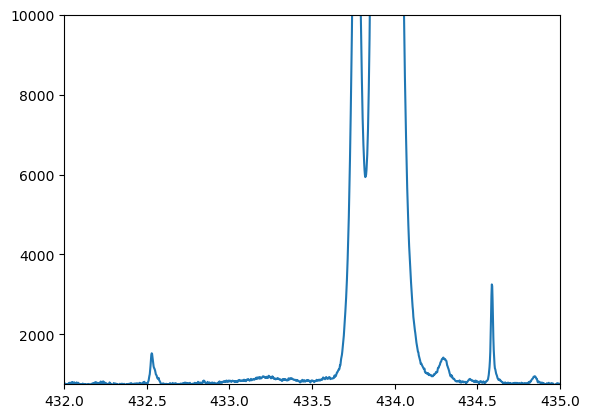

In [24]:
plt.plot(wave,flux)
plt.xlim(432,435)
plt.ylim(750,1e4)

ii = (wave>433).__and__(wave < 433.85)

hg = data.loc[ii]

hg_w,hg_f =hg['wavelength'].to_numpy() , hg['data'].to_numpy()

b= hg_f.argmax()
print(a)
plt.plot(hg_w[b],hg_f[b],'ro')

433.7685277807802 0.04


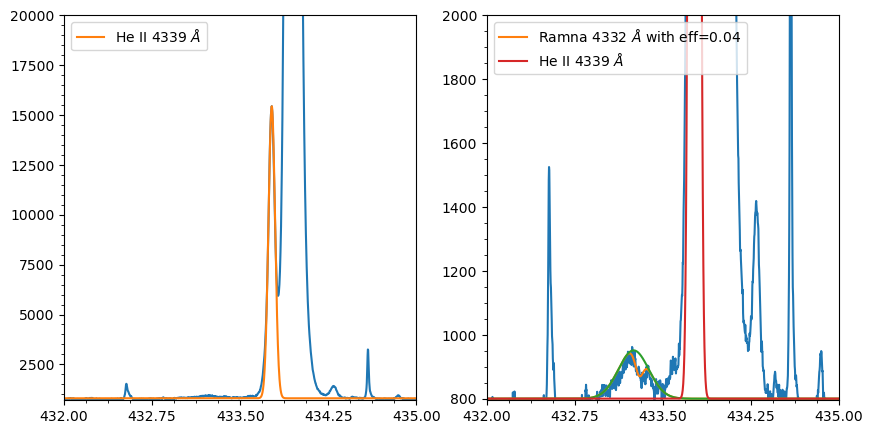

In [25]:

fig = plt.figure(1,figsize=(10,5))
x=np.linspace(wave[0],wave[-1],len(wave))
x_low , x_high = 432,435
y_low, y_high = 700, 2e4
Fc= 800
# print(xl_w)
F0 = (hg_f[b]) - Fc
lam = hg_w[b]
lam_0 = 434.0
delm= 0.04
print(lam,delm)
ratio = 4340/949


def R_Flux(F0,lam,lam_i,del_lam_i,ratio,dum_lam,del_duml,tau,Flux_R,eff):
    ff = (lam-lam_i)/(ratio*del_lam_i) 
    fl = F0*np.exp(-ff**2) 
    opf = tau*np.exp(-((lam-dum_lam)/del_duml)**2) 
    return (((fl)/ratio**2 * (Flux_R*eff)))*(1-opf) + Fc
# (((fl)/ratio**2 * 0.2))*(1-opf) + 800 + 50*np.exp(-ff**2) /ratio**2 * 0.2

def Flux(F0,lam,lam_i,del_lam_i):
    ff = (lam-lam_i)/(del_lam_i) 
    fl = (F0*np.exp(-ff**2) + Fc) 
    return fl

plt.subplot(121)
plt.plot(wave,flux)
# plt.plot(x,R_Flux(F0,x,409.6,delm,ratio,409.),label='Ramna 409 nm')
plt.plot(x,Flux(F0,x,lam,delm),label=r'He II 4339 $\AA$')
plt.xlim(x_low,x_high)
plt.ylim(y_low,y_high)
plt.legend()
plt.xticks(np.linspace(x_low,x_high,5))
plt.minorticks_on()


plt.subplot(122)
plt.plot(wave,flux)


plt.plot(x,R_Flux(F0,x,433.25,delm,ratio,433.3,0.05,0.5,5.4,0.04),label=r'Ramna 4332 $\AA$ with eff={}'.format(0.04))
plt.plot(x,R_Flux(F0,x,433.25,delm,ratio,433.3,0.05,0,5.4,0.04))
plt.plot(x,Flux(F0,x,lam,delm),label=r'He II 4339 $\AA$')
plt.xlim(x_low,x_high)
plt.ylim(795,2e3)
plt.legend()
plt.xticks(np.linspace(x_low,x_high,5))
plt.minorticks_on()

H beta

27


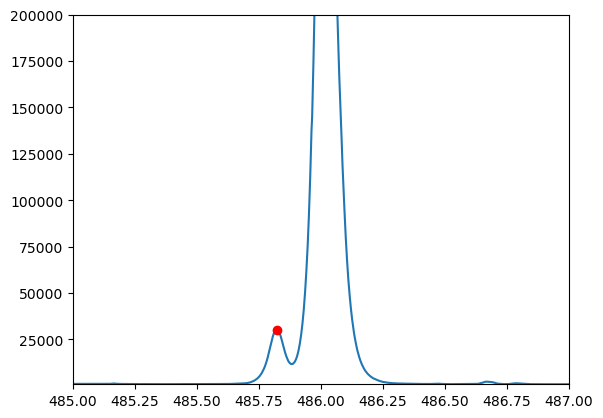

In [26]:
plt.plot(wave,flux)
plt.xlim(485,487)
plt.ylim(800,2e5)

ii = (wave>485.75).__and__(wave < 485.92)

hb = data.loc[ii]

hb_w,hb_f =hb['wavelength'].to_numpy() , hb['data'].to_numpy()

c= hb_f.argmax()
print(c)
plt.plot(hb_w[c],hb_f[c],'ro')

485.8213027675724 0.05


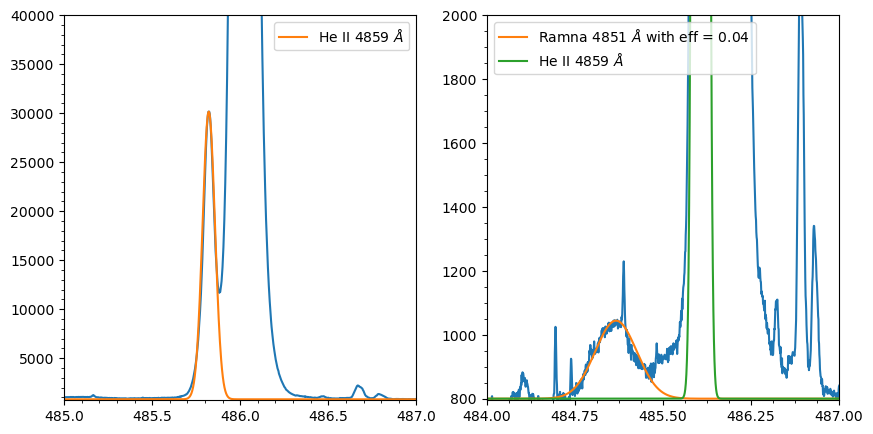

In [27]:

fig = plt.figure(1,figsize=(10,5))
x=np.linspace(wave[0],wave[-1],len(wave))
x_low , x_high = 485,487
y_low, y_high = 700, 2e4
Fc= 800
# print(xl_w)
F0 = (hb_f[c]) - Fc
lam = hb_w[c]
lam_0 = 4861
delm= 0.05
print(lam,delm)
ratio = 4861/972


def R_Flux(F0,lam,lam_i,del_lam_i,ratio,dum_lam,del_duml,tau,Flux_R,eff):
    ff = (lam-lam_i)/(ratio*del_lam_i) 
    fl = F0*np.exp(-ff**2) 
    opf = tau*np.exp(-((lam-dum_lam)/del_duml)**2) 
    return (((fl)/ratio**2 * (Flux_R*eff)))*(1-opf) + Fc
# (((fl)/ratio**2 * 0.2))*(1-opf) + 800 + 50*np.exp(-ff**2) /r
def Flux(F0,lam,lam_i,del_lam_i):
    ff = (lam-lam_i)/(del_lam_i) 
    fl = (F0*np.exp(-ff**2) + Fc) 
    return fl

plt.subplot(121)
plt.plot(wave,flux)
# plt.plot(x,R_Flux(F0,x,409.6,delm,ratio,409.),label='Ramna 409 nm')
plt.plot(x,Flux(F0,x,lam,delm),label=r'He II 4859 $\AA$')
plt.xlim(x_low,x_high)
plt.ylim(y_low,y_high*2)
plt.legend()
plt.xticks(np.linspace(x_low,x_high,5))
plt.minorticks_on()


plt.subplot(122)
plt.plot(wave,flux)


plt.plot(x,R_Flux(F0,x,485.1,delm,ratio,485.165,0.015,0,5.2,0.04),label=r'Ramna 4851 $\AA$ with eff = {}'.format(0.04))
plt.plot(x,Flux(F0,x,lam,delm),label=r'He II 4859 $\AA$')
plt.xlim(x_low-1,x_high)
plt.ylim(795,2e3)
plt.legend()
plt.xticks(np.linspace(x_low-1,x_high,5))
plt.minorticks_on()

H alpha

409.9098201961653 0.049820196165285324
433.7685277807802 0.04
485.8213027675724 0.05


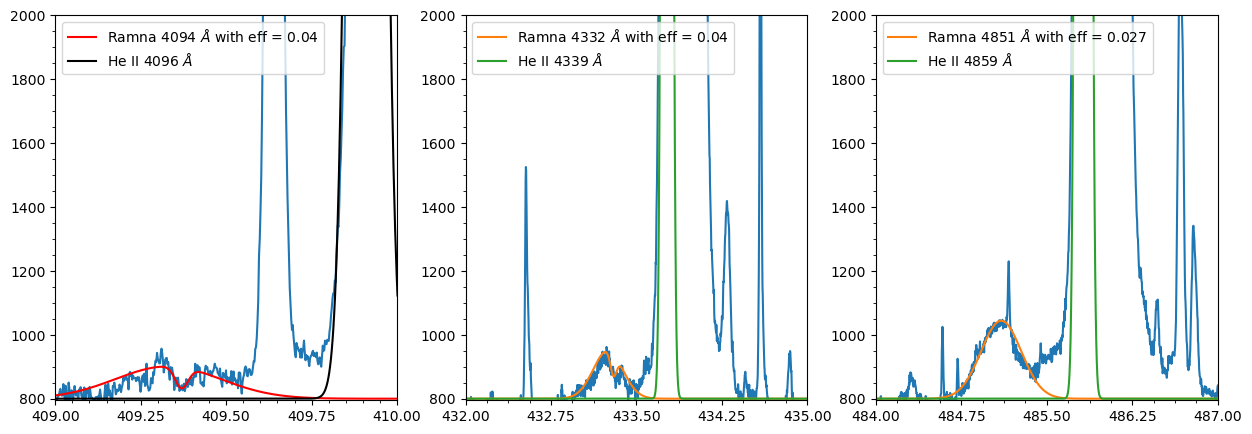

In [28]:
fig = plt.figure(1,figsize=(15,5))
x=np.linspace(wave[0],wave[-1],len(wave))
# print(xl_w)


plt.subplot(131)
F0 = (xl_f[a]) - 800
lam = xl_w[a]
lam_0 = 409.86
delm= abs(lam - lam_0 ) 
print(lam,delm)
ratio = 4094/937.4
plt.plot(wave,flux)
plt.plot(x,R_Flux(F0,x,409.33,delm,ratio,409.37,0.027,0.67,5.2,0.04),'r',label=r'Ramna 4094 $\AA$ with eff = {}'.format(0.04))
plt.plot(x,Flux(F0,x,lam,delm),'k',label=r'He II 4096 $\AA$')
plt.xlim(409,410)
plt.ylim(795,2e3)
plt.legend()
plt.xticks(np.linspace(409,410,5))
plt.minorticks_on()



plt.subplot(132)
x_low , x_high = 432,435
y_low, y_high = 700, 2e4
Fc= 800
# print(xl_w)
F0 = (hg_f[b]) - Fc
lam = hg_w[b]
lam_0 = 434.0
delm= 0.04
print(lam,delm)
ratio = 4340/949

plt.plot(wave,flux)
plt.plot(x,R_Flux(F0,x,433.25,delm,ratio,433.3,0.04,0.5,5.4,0.04),label=r'Ramna 4332 $\AA$ with eff = {}'.format(0.04))
plt.plot(x,Flux(F0,x,lam,delm),label=r'He II 4339 $\AA$')
plt.xlim(x_low,x_high)
plt.ylim(795,2e3)
plt.legend()
plt.xticks(np.linspace(x_low,x_high,5))
plt.minorticks_on()



plt.subplot(133)
plt.plot(wave,flux)

x_low , x_high = 485,487
y_low, y_high = 700, 2e4
Fc= 800
# print(xl_w)
F0 = (hb_f[c]) - Fc
lam = hb_w[c]
lam_0 = 4861
delm= 0.05
print(lam,delm)
ratio = 4861/972
plt.plot(x,R_Flux(F0,x,485.1,delm,ratio,485.16,0.015,0,7.7,0.027),label=r'Ramna 4851 $\AA$ with eff = {}'.format(0.027))
plt.plot(x,Flux(F0,x,lam,delm),label=r'He II 4859 $\AA$')
plt.xlim(x_low-1,x_high)
plt.ylim(795,2e3)
# plt.ylim(1000,1300)
plt.legend()
plt.xticks(np.linspace(x_low-1,x_high,5))
plt.minorticks_on()



